In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score,mean_absolute_error,mean_squared_error,median_absolute_error,mean_squared_log_error

In [2]:
!pip install xlrd

In [3]:
data_original=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [4]:
data_original.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
data_original.shape

(1200, 28)

In [6]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
data_original.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [8]:
data_emp=pd.DataFrame(data_original.groupby('EmpDepartment')["PerformanceRating"].mean())

In [9]:
import matplotlib.colors as mcolors
color = ['lightblue', 'blue', 'purple', 'red', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'darkred', 'yellow']

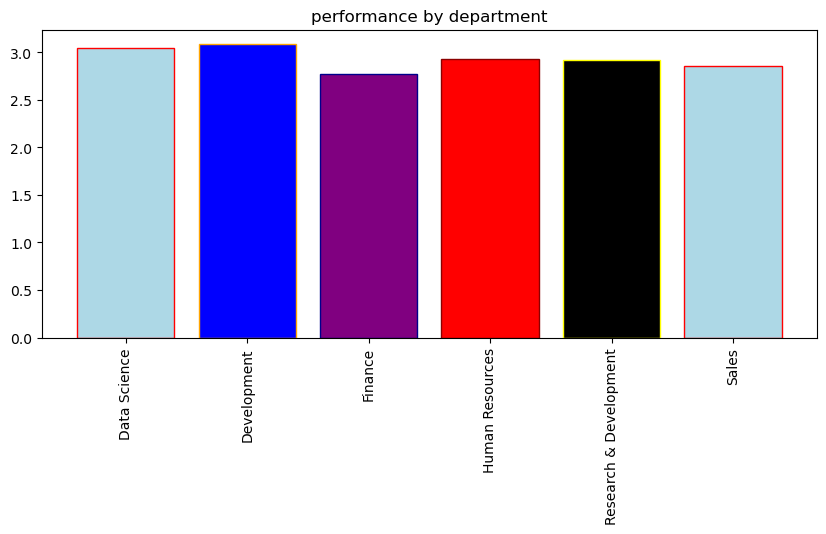

In [10]:
plt.figure(figsize=(10,4))
plt.bar(data_emp.index,data_emp["PerformanceRating"],color=color,edgecolor=edgecolor)
plt.title("performance by department")
plt.xticks(rotation="vertical")
plt.show()

In [11]:
data_original.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [12]:
labelencoder = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data_original.iloc[:,i] = labelencoder.fit_transform(data_original.iloc[:,i])
data_original.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_6488\4286751687.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_original.iloc[:,i] = labelencoder.fit_transform(data_original.iloc[:,i])
C:\Users\ACER\AppData\Local\Temp\ipykernel_6488\4286751687.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_original.iloc[:,i] = labelencoder.fit_transform(data_original.iloc[:,i])
C:\Users\ACER\AppData\Local\Temp\ipykernel_6488\4286751687.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inpla

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [13]:
corr_data=data_original.corr()
corr_data=corr_data[((corr_data["PerformanceRating"]>0.2)|(corr_data["PerformanceRating"]<-0.1))&(corr_data["PerformanceRating"]!=1)]["PerformanceRating"].index

C:\Users\ACER\AppData\Local\Temp\ipykernel_6488\4263393286.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data=data_original.corr()


In [14]:
x=corr_data.tolist()

In [15]:
y=data_original["PerformanceRating"]
x=data_original[x]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
 standardscaler=StandardScaler()

In [18]:
x_train =standardscaler.fit_transform(x_train)
x_test =standardscaler.transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression

r2 score : - - > 0.14036996735582175
accuracy score : - - > 0.8055555555555556


In [21]:
from sklearn.svm import SVC

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

In [32]:
for modelLog in models:
    modelLog.fit(x_train,y_train)
    modelLogpred=modelLog.predict(x_test)
    print(f"r2 score {modelLog} : - - >",r2_score(y_test,modelLogpred))
    print(f"accuracy score {modelLog} : - - >",accuracy_score(y_test,modelLogpred))
    print(f"mean_absolute_error {modelLog} : - - >",mean_absolute_error(y_test,modelLogpred))
    print(f"mean_squared_error {modelLog} : - - >",mean_squared_error(y_test,modelLogpred))
    print(f"median_absolute_error {modelLog} : - - >",median_absolute_error(y_test,modelLogpred))
    print(f"mean_squared_log_error {modelLog} : - - >",mean_squared_log_error(y_test,modelLogpred))

r2 score LogisticRegression() : - - > 0.14036996735582175
accuracy score LogisticRegression() : - - > 0.8055555555555556
mean_absolute_error LogisticRegression() : - - > 0.20277777777777778
mean_squared_error LogisticRegression() : - - > 0.21944444444444444
median_absolute_error LogisticRegression() : - - > 0.0
mean_squared_log_error LogisticRegression() : - - > 0.01510466568724437
r2 score SVC() : - - > 0.47769314472252455
accuracy score SVC() : - - > 0.8666666666666667
mean_absolute_error SVC() : - - > 0.13333333333333333
mean_squared_error SVC() : - - > 0.13333333333333333
median_absolute_error SVC() : - - > 0.0
mean_squared_log_error SVC() : - - > 0.008928512204431917
r2 score DecisionTreeClassifier() : - - > 0.37976060935799794
accuracy score DecisionTreeClassifier() : - - > 0.8666666666666667
mean_absolute_error DecisionTreeClassifier() : - - > 0.14166666666666666
mean_squared_error DecisionTreeClassifier() : - - > 0.15833333333333333
median_absolute_error DecisionTreeClassifier(